![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
!pip install xgboost
import xgboost as xgb

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import math as m

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
!pip install pandas
import pandas as pd
import numpy as np

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [6]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [7]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [8]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [9]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


In [10]:
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


In [11]:
# Analisis preliminar
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [12]:
cats = ['State','Make','Model']
cont = ['Year','Mileage']
totvars = cats+cont

In [13]:
dataTraining.shape[0]

400000

In [14]:
print('State:',len(dataTraining['State'].unique()),
      'Make:',len(dataTraining['Make'].unique()),
      'Model:',len(dataTraining['Model'].unique())
)

State: 51 Make: 38 Model: 525


In [15]:
sorted(dataTraining['Model'].unique())

['1',
 '15002WD',
 '15004WD',
 '1500Laramie',
 '1500Tradesman',
 '200LX',
 '200Limited',
 '200S',
 '200Touring',
 '25002WD',
 '25004WD',
 '3',
 '300300C',
 '300300S',
 '3004dr',
 '300Base',
 '300Limited',
 '300Touring',
 '35004WD',
 '350Z2dr',
 '4Runner2WD',
 '4Runner4WD',
 '4Runner4dr',
 '4RunnerLimited',
 '4RunnerRWD',
 '4RunnerSR5',
 '4RunnerTrail',
 '5',
 '500Pop',
 '6',
 '7',
 '911',
 '9112dr',
 'A34dr',
 'A44dr',
 'A64dr',
 'A8',
 'AcadiaAWD',
 'AcadiaFWD',
 'Accent4dr',
 'Accord',
 'AccordEX',
 'AccordEX-L',
 'AccordLX',
 'AccordLX-S',
 'AccordSE',
 'Altima4dr',
 'Armada2WD',
 'Armada4WD',
 'Avalanche2WD',
 'Avalanche4WD',
 'Avalon4dr',
 'AvalonLimited',
 'AvalonTouring',
 'AvalonXLE',
 'Azera4dr',
 'Boxster2dr',
 'C-Class4dr',
 'C-ClassC',
 'C-ClassC300',
 'C-ClassC350',
 'C702dr',
 'CC4dr',
 'CR-V2WD',
 'CR-V4WD',
 'CR-VEX',
 'CR-VEX-L',
 'CR-VLX',
 'CR-VSE',
 'CR-ZEX',
 'CT',
 'CTCT',
 'CTS',
 'CTS-V',
 'CTS4dr',
 'CX-7FWD',
 'CX-9AWD',
 'CX-9FWD',
 'CX-9Grand',
 'CX-9Touring

In [16]:
counts = (dataTraining['Model'].value_counts()/dataTraining.shape[0])*100
counts = pd.DataFrame(counts.copy()).reset_index()
counts['sumacumulada'] = counts['count'].cumsum()
sups =set(sorted(counts[counts['sumacumulada']>80]['Model'].unique()))

In [17]:
sups

{'1',
 '15002WD',
 '1500Laramie',
 '1500Tradesman',
 '200LX',
 '200S',
 '200Touring',
 '25002WD',
 '300300S',
 '3004dr',
 '300Base',
 '300Limited',
 '300Touring',
 '35004WD',
 '350Z2dr',
 '4Runner2WD',
 '4Runner4dr',
 '4RunnerLimited',
 '4RunnerRWD',
 '4RunnerTrail',
 '500Pop',
 '6',
 '911',
 '9112dr',
 'A34dr',
 'A44dr',
 'A64dr',
 'A8',
 'Accent4dr',
 'AccordEX',
 'AccordLX-S',
 'AccordSE',
 'Armada2WD',
 'Armada4WD',
 'Avalanche2WD',
 'Avalanche4WD',
 'Avalon4dr',
 'AvalonLimited',
 'AvalonTouring',
 'Azera4dr',
 'Boxster2dr',
 'C-ClassC350',
 'C702dr',
 'CC4dr',
 'CR-V2WD',
 'CR-VSE',
 'CR-ZEX',
 'CT',
 'CTCT',
 'CTS-V',
 'CTS4dr',
 'CX-7FWD',
 'CX-9AWD',
 'CX-9FWD',
 'CX-9Grand',
 'CX-9Touring',
 'Caliber4dr',
 'CamryBase',
 'CamryL',
 'Canyon2WD',
 'Canyon4WD',
 'CanyonCrew',
 'CanyonExtended',
 'CayenneAWD',
 'Cayman2dr',
 'CherokeeSport',
 'CivicEX-L',
 'CivicSi',
 'Cobalt2dr',
 'Cobalt4dr',
 'Colorado2WD',
 'Colorado4WD',
 'ColoradoExtended',
 'Compass4WD',
 'CompassLimited',


In [18]:
for cat in cats:
    counts = (dataTraining[cat].value_counts()/dataTraining.shape[0])*100
    counts = pd.DataFrame(counts.copy()).reset_index()
    counts['sumacumulada'] = counts['count'].cumsum()
    conteo_cate = len(counts[counts['sumacumulada']<=80])
    print(cat,':',conteo_cate)
    

State : 20
Make : 11
Model : 179


In [19]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [20]:
from sklearn.metrics import mutual_info_score

# Suponiendo que tienes dos arrays o listas que representan las dos variables

# Calcular la información mutua entre las dos variables
for cat in cats:
    mutual_information = mutual_info_score(dataTraining['Price'],dataTraining[cat])

    print("Información mutua:",cat, mutual_information)


Información mutua: State 0.8498630617280598
Información mutua: Make 0.6612504268074006
Información mutua: Model 2.134555572347259


In [21]:
for var in totvars:
    mutual_information = mutual_info_score(dataTraining['Price'],dataTraining[var])

    print("Información mutua:",var, mutual_information)

Información mutua: State 0.8498630617280598
Información mutua: Make 0.6612504268074006
Información mutua: Model 2.134555572347259
Información mutua: Year 0.5901766007118817
Información mutua: Mileage 7.205669024297045


In [22]:
count = (dataTraining['State'].value_counts()/dataTraining.shape[0])*100
counts = pd.DataFrame(counts.copy()).reset_index()

counts['sumacumulada'] = counts['count'].cumsum()

In [23]:
counts[counts['sumacumulada']<=80]

,index,Model,count,sumacumulada
0,0,Silverado,4.52125,4.52125
1,1,Grand,3.08600,7.60725
2,2,Sierra,2.10225,9.70950
3,3,Accord,1.83925,11.54875
4,4,F-1504WD,1.67100,13.21975
...,...,...,...,...
174,174,Econoline,0.15050,79.35900
175,175,X5AWD,0.15025,79.50925
176,176,Camry,0.14775,79.65700
177,177,RAV44WD,0.14725,79.80425


In [24]:
!pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

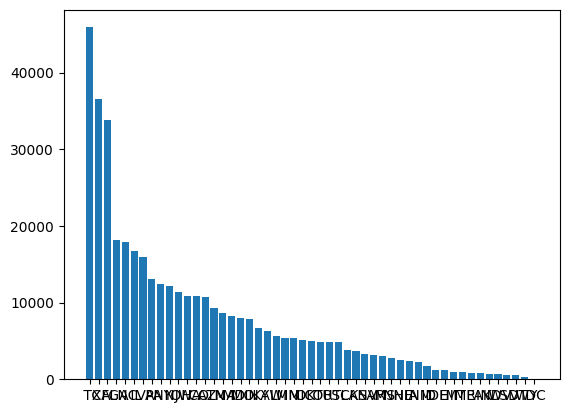

In [25]:
plt.bar(dataTraining['State'].value_counts().index,dataTraining['State'].value_counts())
plt.tight_layout

In [26]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


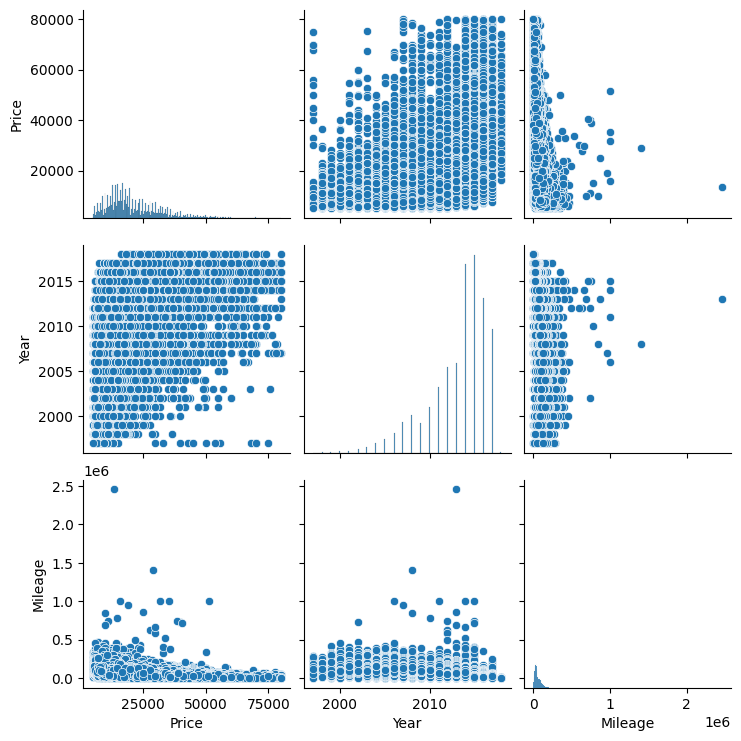

In [27]:
import seaborn as sns
sns.pairplot(dataTraining)

In [28]:
dataTraining

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


In [29]:
dataTraining['Price'].describe()

count    400000.000000
mean      21146.919312
std       10753.664940
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26999.000000
max       79999.000000
Name: Price, dtype: float64

In [30]:
dataTraining['Year'].describe()

count    400000.000000
mean       2013.198125
std           3.292326
min        1997.000000
25%        2012.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: Year, dtype: float64

In [31]:
dataTraining['Mileage'].describe()

count    4.000000e+05
mean     5.507296e+04
std      4.088102e+04
min      5.000000e+00
25%      2.584100e+04
50%      4.295500e+04
75%      7.743300e+04
max      2.457832e+06
Name: Mileage, dtype: float64

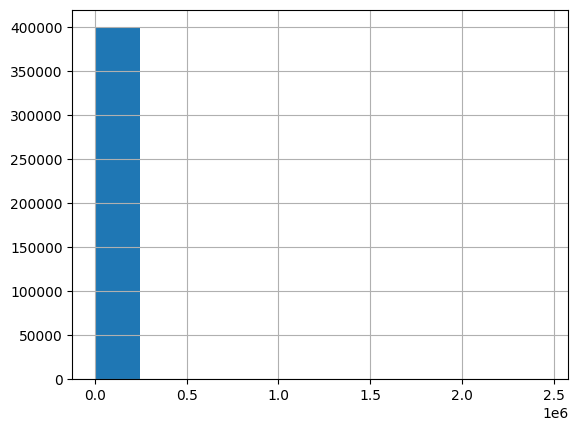

In [32]:
dataTraining['Mileage'].hist()
plt.show()

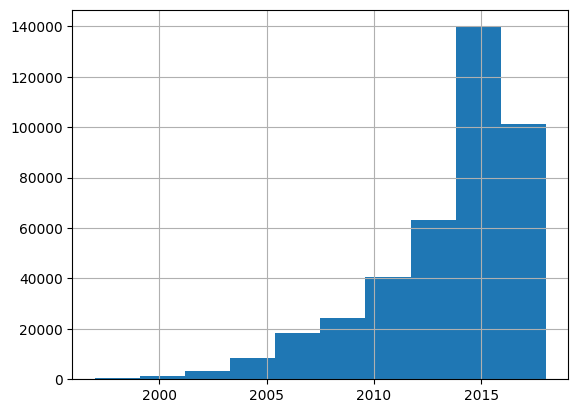

In [33]:
dataTraining['Year'].hist()
plt.show()

In [34]:
rf = RandomForestRegressor(n_estimators=50,max_depth=5,max_features='sqrt')
rf.fit(XTrain,yTrain)
preds = rf.predict(XTest)

NameError: name 'XTrain' is not defined

In [ ]:
rf_regressor = RandomForestRegressor()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],       # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para estar en un nodo hoja
}
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(XTrain, yTrain)

KeyboardInterrupt: 

In [ ]:
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(XTest)

In [ ]:
m.sqrt(mean_squared_error(yTest,preds))

8968.991149797283

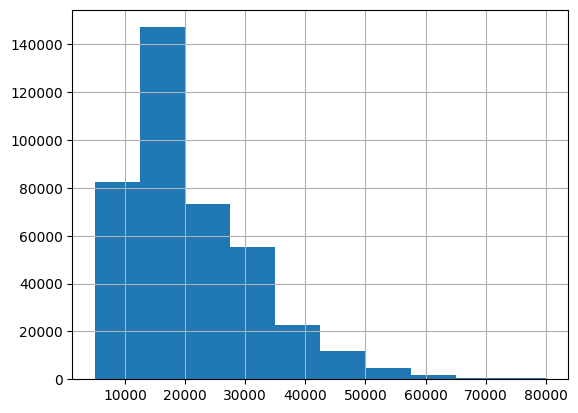

In [ ]:
dataTraining['Price'].hist()
plt.show()

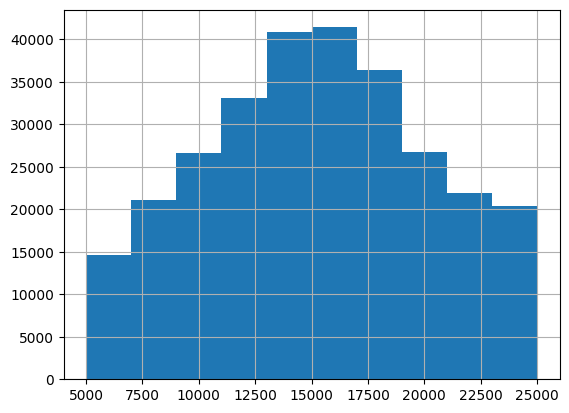

In [ ]:
dataTraining[dataTraining['Price']<=25000]['Price'].hist()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
boost = XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.4,learning_rate=0.3, 
                     gamma=0.9e5, max_depth= 7,
                      n_estimators =500,enable_categorical=True,n_jobs=-1,
                      random_state=0)

In [ ]:
X = dataTraining.copy()
X['Model'] = X['Model'].astype('category')
X['Make'] = X['Make'].astype('category')
X['State'] = X['State'].astype('category')
X

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler
...,...,...,...,...,...,...
399995,29900,2015,25287,TX,Lexus,RXRX
399996,17688,2015,17677,MI,Chevrolet,EquinoxFWD
399997,24907,2014,66688,NC,Buick,EnclaveLeather
399998,11498,2014,37872,IN,Volkswagen,Jetta


In [ ]:
thresholds = list(range(10000,80000,5000))
rmses=[]
sizes=[]
thresholds

[10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 45000,
 50000,
 55000,
 60000,
 65000,
 70000,
 75000]

In [ ]:
for thres in thresholds:
    XTotal = X.copy()[X['Price']<=thres][['Year','Mileage','Make','Model','State']]
    yTotal = dataTraining[dataTraining['Price']<=thres]['Price']
    XTrain,XTest,yTrain,yTest = train_test_split(XTotal,yTotal,test_size=0.33,random_state=1)
    boost.fit(XTrain, yTrain)
    predictions = boost.predict(XTest)
    sizes.append(len(yTest))
    rmses.append(m.sqrt(mean_squared_error(yTest,predictions)))

In [ ]:
len(rmses)

14

In [ ]:
rmses

[1035.508526712998,
 1382.8304621786617,
 1657.2790689408223,
 1930.9964916699805,
 2162.059511742081,
 2406.343430966738,
 2638.917264129689,
 2828.9265136583967,
 3005.716372706365,
 3144.36619929411,
 3312.4577192620204,
 3374.973290605527,
 3441.1727872086026,
 3457.5952877171667]

In [ ]:
thresholds

[10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 45000,
 50000,
 55000,
 60000,
 65000,
 70000,
 75000]

In [ ]:
len(thresholds)

14

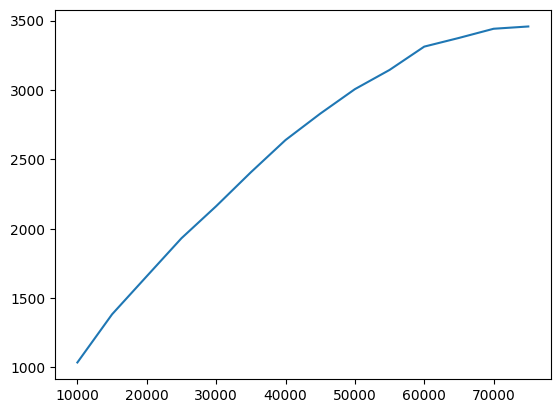

In [ ]:
plt.plot(thresholds,rmses)
plt.show()

In [ ]:
for i,j in enumerate(sizes):
    print((j/max(sizes))*100,rmses[i],thresholds[i])


12.2658743092771 1035.508526712998 10000
34.06505112675949 1382.8304621786617 15000
57.41660160543331 1657.2790689408223 20000
70.73608889764795 1930.9964916699805 25000
81.98018601196117 2162.059511742081 30000
89.65640088837009 2406.343430966738 35000
94.29002402843997 2638.917264129689 40000
96.61252056061306 2828.9265136583967 45000
98.24145171193159 3005.716372706365 50000
99.1207258559658 3144.36619929411 55000
99.63009846354424 3312.4577192620204 60000
99.81732321662737 3374.973290605527 65000
99.94618235842549 3441.1727872086026 70000
100.0 3457.5952877171667 75000


In [ ]:
XTotal = X.copy()[X['Price']<=45000][['Year','Mileage','State','Make','Model']]
XTotal = pd.get_dummies(XTotal, columns=['State','Make','Model'],drop_first=True)
XTotal.sort_index(axis=1,inplace= True)
yTotal = dataTraining.copy()[dataTraining['Price']<=45000]['Price']
XTrain,XTest,yTrain,yTest = train_test_split(XTotal,yTotal,test_size=0.33,random_state=1)

In [ ]:
XTotal2 = X.copy()[X['Price']<=45000][['Year','Mileage','State','Make','Model']]
XTotal2['Model']= XTotal2['Model'].map(lambda x: 'otros' if x in sups else x)
XTotal2 = pd.get_dummies(XTotal2, columns=['State','Make','Model'],drop_first=True)
XTotal2.sort_index(axis=1,inplace= True)
yTotal2 = dataTraining.copy()[dataTraining['Price']<=45000]['Price']
XTrain2,XTest2,yTrain2,yTest2 = train_test_split(XTotal2,yTotal2,test_size=0.33,random_state=1)

In [ ]:
boost.fit(XTrain, yTrain)
predictions = boost.predict(XTest)

In [ ]:
boost.fit(XTrain2, yTrain2)
predictions2 = boost.predict(XTest2)

In [ ]:
(m.sqrt(mean_squared_error(yTest,predictions)))

2853.584918147388

In [ ]:
(m.sqrt(mean_squared_error(yTest2,predictions2)))

3597.7731373814977

In [ ]:
dataTest = dataTesting.copy()
dataTest['Model'] = dataTest['Model'].astype('category')
dataTest['Make'] = dataTest['Make'].astype('category')
dataTest['State'] = dataTest['State'].astype('category')
dataTest = pd.get_dummies(dataTest, columns=['State','Make','Model'],drop_first=True)

In [ ]:
colsXTotal = set(XTotal.columns)
colsdataTest = set(dataTest.columns)
#Hallamos los columnas compartidas en ambos datasets
cols_compartidas = colsXTotal.intersection(colsdataTest)
#Creamos una lista para cada dataset para revisar que columnas no están en el otro dataset
revdataTest = [i for i in colsXTotal if i not in cols_compartidas]

In [ ]:
revdataTest

['Make_Freightliner']

In [ ]:
dataTest.shape[1]

612

In [ ]:
XTotal.shape[1]

613

In [ ]:
dataTest[revdataTest] = 0

In [ ]:
dataTest.sort_index(axis=1,inplace=True)

In [ ]:
y_pred = pd.DataFrame(boost.predict(dataTest))

In [ ]:
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,0
0,21505.763672
1,36808.511719
2,23439.218750
3,8157.271484
4,29908.765625


In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],          # Tasa de aprendizaje
    'n_estimators': [50, 100],            # Número de árboles de decisión
    'max_depth': [3, 5, 7],                     # Profundidad máxima del árbol              # Peso mínimo del niño (hijo) requerido para dividir el nodo
    'gamma': [0, 0.1, 0.2],                     # Parámetro de regularización gamma             # Proporción de muestras utilizadas para ajustar cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0]       # Proporción de características utilizadas para ajustar cada árbo            # Término de regularización L2 (lambda)
}
grid_search = GridSearchCV(estimator=boost, param_grid=param_grid, cv=5)

In [ ]:
# Ajustar la cuadrícula de parámetros utilizando GridSearchCV
grid_search.fit(XTrain, yTrain)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
predictions = best_model.predict(XTest)


Mejores parámetros: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [ ]:
m.sqrt(mean_squared_error(yTest,predictions))

8938.731567689756

In [ ]:
a=XGBRegressor(enable_categorical=True)